In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

In [13]:
seoul_df = pd.read_excel('../data/data_total_2019.xlsx')
seoul_df.head()

,기간,자치구,인구 수(명),면적,범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수,"반려동물 가구 비율(%, 인구 수)",행복지수 종합
0,2019,강남구,550209,39.50,7304,23,7,3455,803,155,549,13788,787,23.5,7.01
1,2019,강동구,440390,24.59,4014,17,6,1051,364,124,390,7477,331,20.3,6.40
2,2019,강북구,317695,23.60,3838,15,5,681,266,82,451,4339,272,18.8,7.11
3,2019,강서구,598273,41.44,4924,13,7,1399,518,170,604,8919,538,19.8,6.72
4,2019,관악구,517334,29.57,5328,20,5,1105,430,110,482,5304,412,17.1,7.14


In [14]:
seoul_df.columns

Index(['기간', '자치구', '인구 수(명)', '면적', '범죄발생건수', '경찰관서 수', '소방관서 수', '카페 수',
       '편의점 수', '공원 수', '버스정류장 수', '가로등 수', 'ATM 수', '반려동물 가구 비율(%, 인구 수)',
       '행복지수 종합'],
      dtype='object')

In [23]:
seoul = seoul_df.copy()
var_list = ['인구 수(명)', '범죄발생건수', '경찰관서 수', '소방관서 수', '카페 수',
       '편의점 수', '공원 수', '버스정류장 수', '가로등 수', 'ATM 수']
seoul = seoul[var_list].div(seoul.면적, axis = 0)

In [24]:
seoul['자치구'] = seoul_df['자치구']
seoul.sort_values(by = '인구 수(명)', ascending = False).head(5)

,인구 수(명),범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수,자치구
18,26552.843194,184.606548,0.976450,0.344630,47.386559,16.312464,6.950029,21.079839,457.782883,16.829408,양천구
10,25529.043601,259.634318,1.476793,0.421941,65.541491,25.457103,6.680731,22.573840,577.426160,26.582278,동대문구
11,25009.908257,207.951070,1.100917,0.305810,55.596330,18.348624,4.770642,27.278287,345.932722,16.085627,동작구
6,21837.524851,233.946322,0.844930,0.347913,40.755467,17.743539,5.168986,25.447316,374.204771,18.489066,구로구
24,21731.027027,230.702703,0.972973,0.270270,36.756757,16.162162,5.459459,20.486486,309.783784,16.054054,중랑구


In [25]:
seoul.set_index('자치구', inplace = True)
seoul.head()

,인구 수(명),범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수
자치구,,,,,,,,,,
강남구,13929.341772,184.911392,0.582278,0.177215,87.468354,20.329114,3.924051,13.898734,349.063291,19.924051
강동구,17909.312729,163.237088,0.691338,0.244002,42.740952,14.802765,5.042700,15.860106,304.066694,13.460756
강북구,13461.652542,162.627119,0.635593,0.211864,28.855932,11.271186,3.474576,19.110169,183.855932,11.525424
강서구,14437.089768,118.822394,0.313707,0.168919,33.759653,12.500000,4.102317,14.575290,215.226834,12.982625
관악구,17495.231654,180.182618,0.676361,0.169090,37.368955,14.541765,3.719986,16.300304,179.370984,13.933040


In [12]:
seoul.drop('기간', axis = 1, inplace = True)

In [26]:
seoul.head()

,인구 수(명),범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수
자치구,,,,,,,,,,
강남구,13929.341772,184.911392,0.582278,0.177215,87.468354,20.329114,3.924051,13.898734,349.063291,19.924051
강동구,17909.312729,163.237088,0.691338,0.244002,42.740952,14.802765,5.042700,15.860106,304.066694,13.460756
강북구,13461.652542,162.627119,0.635593,0.211864,28.855932,11.271186,3.474576,19.110169,183.855932,11.525424
강서구,14437.089768,118.822394,0.313707,0.168919,33.759653,12.500000,4.102317,14.575290,215.226834,12.982625
관악구,17495.231654,180.182618,0.676361,0.169090,37.368955,14.541765,3.719986,16.300304,179.370984,13.933040


In [29]:
print('인구수\n', np.corrcoef(seoul['인구 수(명)'], seoul['범죄발생건수']))
# print('면적\n', np.corrcoef(seoul['면적'], seoul['범죄발생건수']))
print('경찰관서 수\n', np.corrcoef(seoul['경찰관서 수'], seoul['범죄발생건수']))
print('소방관서 수\n', np.corrcoef(seoul['소방관서 수'], seoul['범죄발생건수']))
print('카페 수\n', np.corrcoef(seoul['카페 수'], seoul['범죄발생건수']))
print('편의점 수\n', np.corrcoef(seoul['편의점 수'], seoul['범죄발생건수']))
print('공원 수\n', np.corrcoef(seoul['공원 수'], seoul['범죄발생건수']))
print('버스정류장 수\n', np.corrcoef(seoul['버스정류장 수'], seoul['범죄발생건수']))
print('가로등 수\n', np.corrcoef(seoul['가로등 수'], seoul['범죄발생건수']))
print('ATM 수\n', np.corrcoef(seoul['ATM 수'], seoul['범죄발생건수']))
# print('반려동물 가구 비율(%, 인구 수)\n', np.corrcoef(seoul['반려동물 가구 비율(%, 인구 수)'], seoul['범죄발생건수']))
# print('행복지수 종합\n', np.corrcoef(seoul['행복지수 종합'], seoul['범죄발생건수']))

인구수
 [[1.        0.2416929]
 [0.2416929 1.       ]]
경찰관서 수
 [[1.         0.78213937]
 [0.78213937 1.        ]]
소방관서 수
 [[1.         0.79406622]
 [0.79406622 1.        ]]
카페 수
 [[1.         0.68220971]
 [0.68220971 1.        ]]
편의점 수
 [[1.         0.91772969]
 [0.91772969 1.        ]]
공원 수
 [[1.         0.47313647]
 [0.47313647 1.        ]]
버스정류장 수
 [[1.         0.32991641]
 [0.32991641 1.        ]]
가로등 수
 [[1.         0.83368396]
 [0.83368396 1.        ]]
ATM 수
 [[1.         0.92251482]
 [0.92251482 1.        ]]


In [30]:
plt.rc('font', family = 'Malgun Gothic')  # 글씨체 불러오기
plt.rcParams['axes.unicode_minus'] = False # '-' 기호 깨지는거 방지

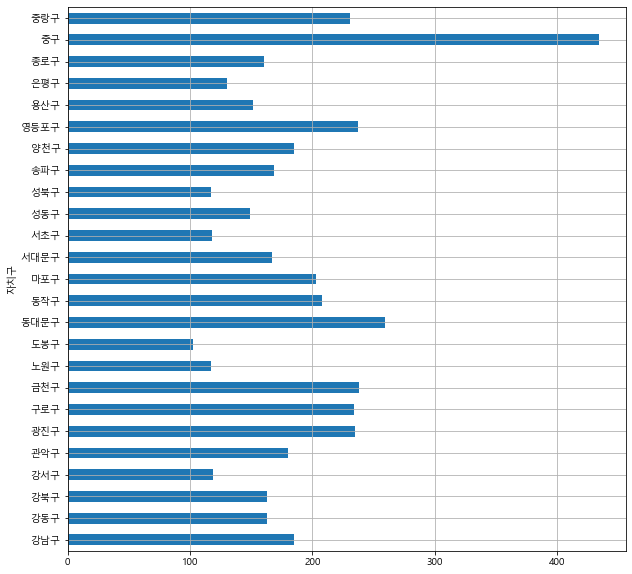

In [31]:
plt.figure(figsize = (10, 10))
seoul['범죄발생건수'].plot(kind = 'barh', grid = True)
plt.show()

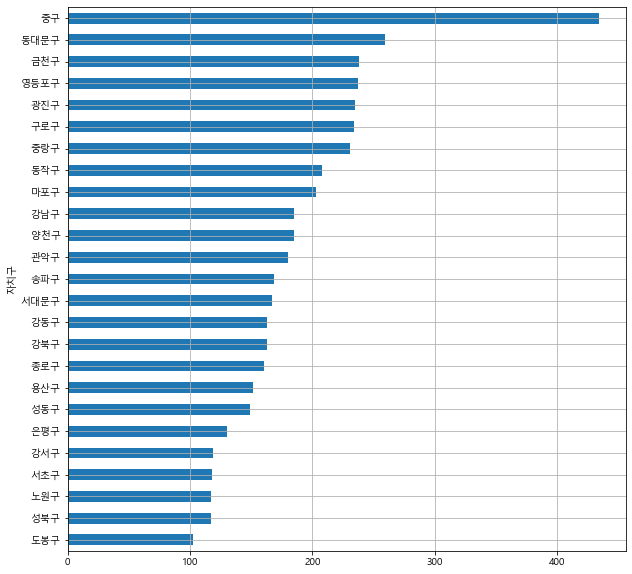

In [32]:
plt.figure(figsize = (10, 10))
seoul['범죄발생건수'].sort_values().plot(kind = 'barh', grid = True)
plt.show()

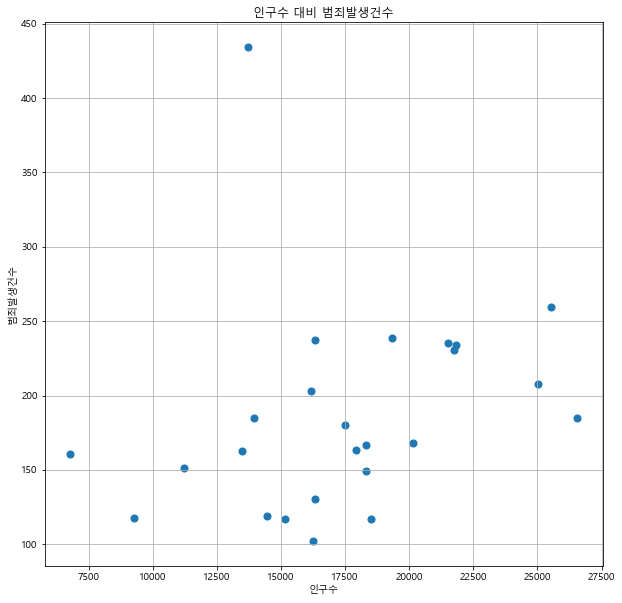

In [33]:
plt.figure(figsize = (10, 10))
plt.scatter(seoul['인구 수(명)'], seoul['범죄발생건수'], s = 50)
plt.title('인구수 대비 범죄발생건수')
plt.xlabel('인구수')
plt.ylabel('범죄발생건수')
plt.grid()
plt.show()

In [34]:
fp1 = np.polyfit(seoul['인구 수(명)'], seoul['범죄발생건수'], 1)
fp1

array([3.45802604e-03, 1.26044587e+02])

In [39]:
f1 = np.poly1d(fp1)
fx = np.linspace(0, 30000, 100)

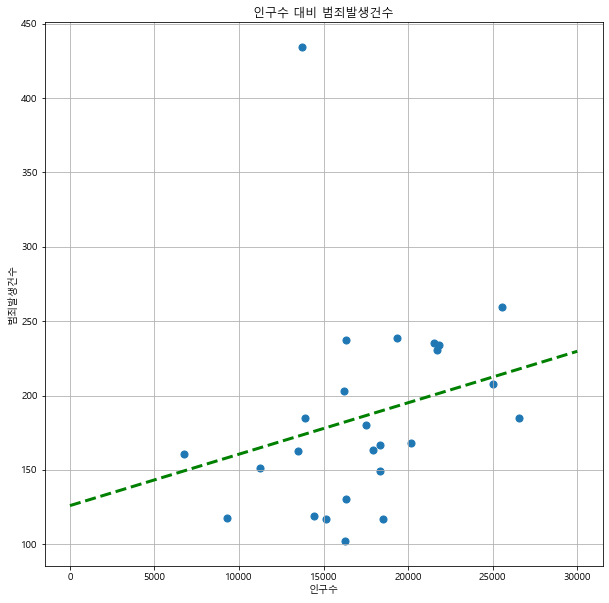

In [40]:
plt.figure(figsize = (10, 10))
plt.scatter(seoul['인구 수(명)'], seoul['범죄발생건수'], s = 50)
plt.plot(fx, f1(fx), ls = '--', lw = 3, color = 'g')
plt.title('인구수 대비 범죄발생건수')
plt.xlabel('인구수')
plt.ylabel('범죄발생건수')
plt.grid()
plt.show()

In [41]:
fp1 = np.polyfit(seoul['인구 수(명)'], seoul['범죄발생건수'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(0, 30000, 100)

seoul['오차'] = np.abs(seoul['범죄발생건수'] - f1(seoul['인구 수(명)']))

df_sort = seoul.sort_values(by = '오차', ascending =False)
df_sort.head()

,인구 수(명),범죄발생건수,경찰관서 수,소방관서 수,카페 수,편의점 수,공원 수,버스정류장 수,가로등 수,ATM 수,오차
자치구,,,,,,,,,,,
중구,13703.614458,434.437751,2.008032,0.702811,150.502008,34.738956,7.329317,21.184739,869.979920,41.465863,261.005708
도봉구,16253.317191,102.179177,0.484262,0.242131,24.406780,11.476998,3.825666,18.983051,220.629540,11.041162,80.069804
성북구,18500.569569,117.046379,1.057771,0.203417,43.002441,13.588283,5.410903,24.491456,227.176566,13.832384,72.973659
노원구,15160.919865,117.183973,0.507901,0.169300,27.398420,9.650113,5.107223,15.406321,268.340858,9.480813,61.287470
강서구,14437.089768,118.822394,0.313707,0.168919,33.759653,12.500000,4.102317,14.575290,215.226834,12.982625,57.146026


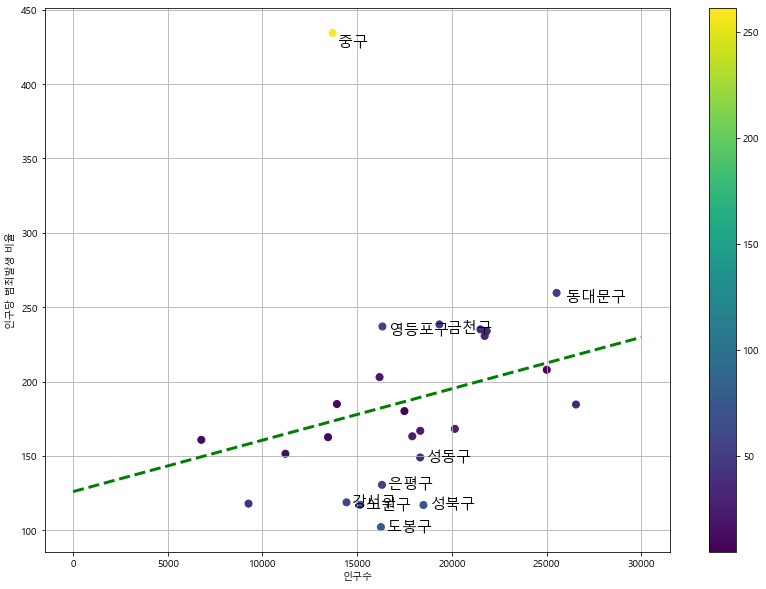

In [42]:
plt.figure(figsize = (14, 10))
plt.scatter(seoul['인구 수(명)'], seoul['범죄발생건수'], c = seoul['오차'], s = 50)
plt.plot(fx, f1(fx), ls = '--', lw = 3, color = 'g')

for n in range(10):
    plt.text(df_sort['인구 수(명)'][n] * 1.02, df_sort['범죄발생건수'][n] * 0.98, df_sort.index[n], fontsize = 15)

plt.xlabel('인구수')
plt.ylabel('인구당 범죄발생 비율')

plt.colorbar()
plt.grid()
plt.show()